### `Finacial News Sentiment Analyzer`

In [67]:
# import the libraries
import pandas as pd
import nltk
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [68]:
# load the dataset
df = pd.read_csv(r"C:\Users\PC\Desktop\finalyzer\all-data.csv", encoding="latin1")
# check
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [69]:
# add headers to the dataset
df.columns = ['Sentiment', 'News']
# check the first five rows again
df.head()

,Sentiment,News
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [70]:
# check general info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4845 non-null   object
 1   News       4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


<Axes: xlabel='Sentiment', ylabel='count'>

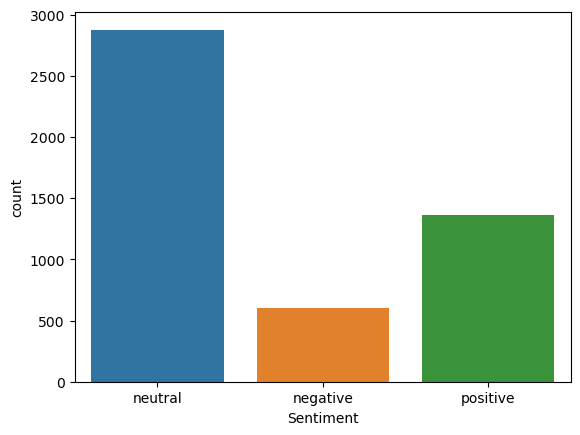

In [71]:
# exploratory data analysis
sns.countplot(x='Sentiment', data=df, hue = 'Sentiment')

In [72]:
# clean the text data (no NLTK required)
import re

basic_stopwords = set([
    "a", "an", "the", "and", "or", "but", "if", "while",
      "with", "to", "from", "in", "on", "at", "by", "for", "of", "is",
        "are", "was", "were", "be", "been", "has", "have", "had", "do",
          "does", "did", "as", "that", "this", "it", "not", "no", "so", "such",
            "than", "too", "very", "can", "will", "just"
])

def clean_text(text):
    text = text.lower()
    tokens = re.findall(r'\b[a-z]+\b', text)
    tokens = [word for word in tokens if word not in basic_stopwords]
    return ' '.join(tokens)

df['Cleaned_News'] = df['News'].apply(clean_text)
df.head()

,Sentiment,News,Cleaned_News
0,neutral,Technopolis plans to develop in stages an area...,technopolis plans develop stages area less squ...
1,negative,The international electronic industry company ...,international electronic industry company elco...
2,positive,With the new production plant the company woul...,new production plant company would increase it...
3,positive,According to the company 's updated strategy f...,according company s updated strategy years bas...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,financing aspocomp s growth aspocomp aggressiv...


In [73]:
# check the cleaned text
df[['News', 'Cleaned_News']].head()

,News,Cleaned_News
0,Technopolis plans to develop in stages an area...,technopolis plans develop stages area less squ...
1,The international electronic industry company ...,international electronic industry company elco...
2,With the new production plant the company woul...,new production plant company would increase it...
3,According to the company 's updated strategy f...,according company s updated strategy years bas...
4,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,financing aspocomp s growth aspocomp aggressiv...


In [74]:
# select features and labels
X = df['Cleaned_News']
y = df['Sentiment']

In [75]:
# transform the text data into TF-IDF features
vectorizer = TfidfVectorizer()
x_transformed = vectorizer.fit_transform(X)
# redefine X to be the transformed data
X = x_transformed
# pickle the vectorizer
import pickle
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [76]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# train the model
Dt = DecisionTreeClassifier()
Dt

DecisionTreeClassifier()

In [78]:
# fit the model
model = Dt.fit(X_train, y_train)
model

DecisionTreeClassifier()

In [79]:
# check the model performance and print the classification report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.62      0.53      0.57       115
     neutral       0.77      0.83      0.80       567
    positive       0.64      0.58      0.61       287

    accuracy                           0.72       969
   macro avg       0.68      0.65      0.66       969
weighted avg       0.71      0.72      0.71       969



In [ ]:
# test the model with new set of data
new_data = [
    "The company reported a significant increase in profits this quarter.",
    "There are concerns about the future of the business due to market instability.",
    "The new product launch was well received by customers.",
    "Management announced layoffs due to declining sales.",
    "The merger is expected to create new opportunities for growth."
]

# Clean the new data using the same function
new_data_cleaned = [clean_text(text) for text in new_data]

# Transform the new data using the saved vectorizer
with open('vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)
new_data_transformed = loaded_vectorizer.transform(new_data_cleaned)

# Predict sentiment
new_predictions = model.predict(new_data_transformed)

# Show results
for text, pred in zip(new_data, new_predictions):
    print(f"Text: {text}\nPredicted Sentiment: {pred}\n")

Text: The company reported a significant increase in profits this quarter.
Predicted Sentiment: neutral

Text: There are concerns about the future of the business due to market instability.
Predicted Sentiment: neutral

Text: The new product launch was well received by customers.
Predicted Sentiment: positive

Text: Management announced layoffs due to declining sales.
Predicted Sentiment: neutral

Text: The merger is expected to create new opportunities for growth.
Predicted Sentiment: positive



In [82]:
# Save the trained model to disk
with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(model, f)